**Chapter 7 – Ensemble Learning and Random Forests**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
# Common imports
import sys
import sklearn
import numpy as np
import os

# Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting). It is one of the most powerful ML model architectures.


## Ensemble learning
A machine learning method where you aggregate the predictions of a group of predictors (classifiers or regressors) to get better predictions than with the best individual predictor. 

The aggregstion function is typically the most frequent prediction for classification, and the average for regression.

To get better predictions than with the best individual predictor, all individual predictors must be independent. Random Forests accomplish this by training each predictor on a different random subset of the training set.


## Bagging and pasting
A random subset of the training set can be sampled in 2 ways:

1) Bagging: with replacement (also called bootstrap aggregation).<br/>
2) Pasting: without replacement

Bagging is generally the preferred, since it often results in better models.


## Out-of-Bag evaluation
When bagging is used (this is default), only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Since a predictor never sees the oob instances during training, it can be evaluated on these instances. You can evaluate the whole forest by averaging out the oob evaluations of each predictor.


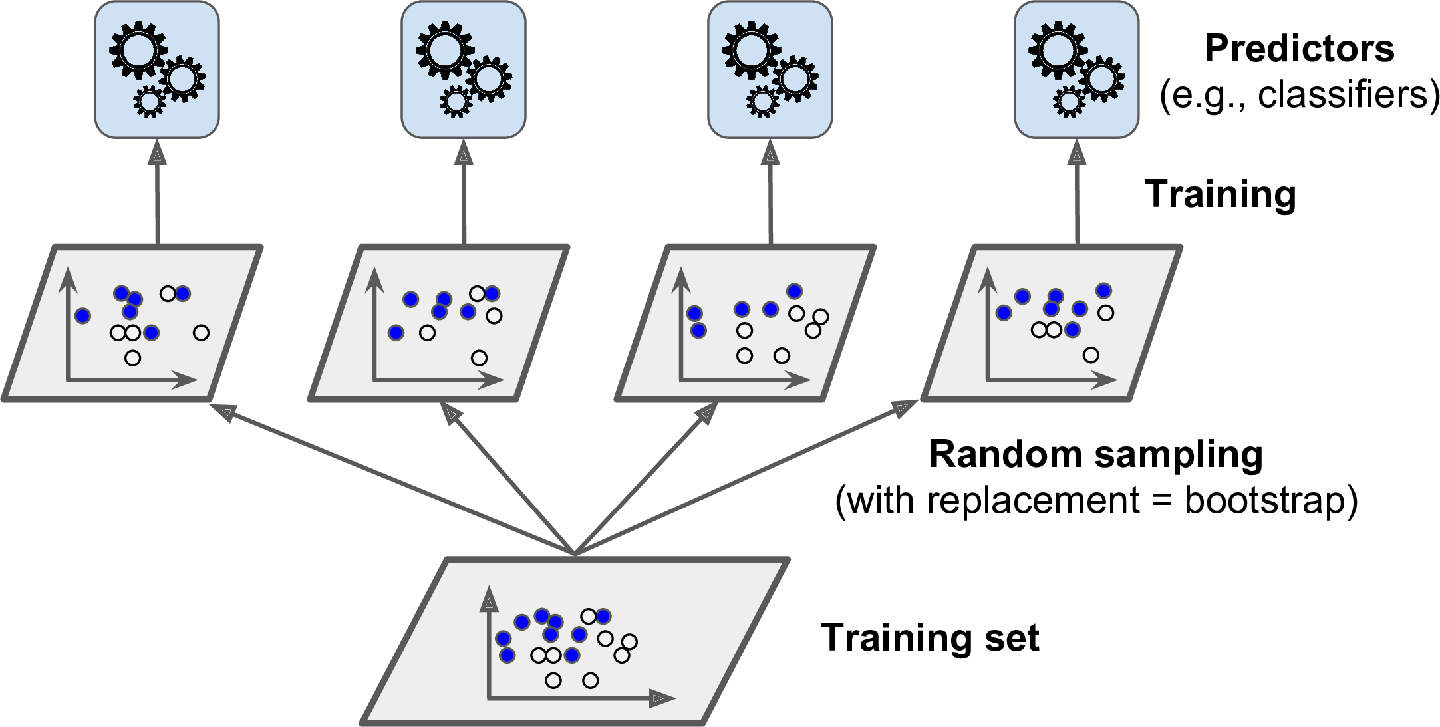

## Training and evaluating a Random Forest Classifier
Scikit-learn provides a RandomForestClassifier and a RandomForestRegressor. Here we will train and evaluate a RandomForestClassifier on the iris dataset.

### Hyperparameters
A RandomForestClassifier has almost all the hyperparameters of a DecisionTreeClassifier, and several others in addition. In the example below, the more interesting of these additional hyperparameters are demonstrated.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
iris = load_iris()

# Train a RandomForestClassifier
# n_estimators (default=100): The number of trees in the forest.
# bootstrap (default=True): Whether to use bagging.
# oob-score (default=False): Whether to use out-of-bag evaluation.
# n_jobs (default=None): The number of jobs to run in parallel (-1 means using all processors)

rnd_clf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

In [ ]:
# Display the oob evaluation score:
rnd_clf.oob_score_

In [ ]:
# Display the relative importance of each feature:
# [sepal length, sepal width, petal length, petal width]
rnd_clf.feature_importances_

# Gradient Boosting

The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. The most popular boosting methods are AdaBoost (not covered here) and Gradient Boosting.

Scikit-learn provides a GradientBoostingClassifier and a GradientBoostingRegressor. Both use Decision Trees as individual predictors. The latter is demonstrated in the example below.

The hyperparameters are similar to those of Random Forests. However, there is one important additional hyperparameter called the learning rate. The learning rate scales the contribution of each tree. If you set it to a low value (e.g. 0.1), you will need many trees in the ensemble to fit the training set, but the predictions will usually generalize better.

Solutions based on Gradient Boosting (using the optimised XGBoost library) has won many ML competitions, and it is widely regarded as the best ML model architecture, when we do not include deep learning neural networks.


## Training and evaluating a GradientBoostingRegressor
We will generate a noisy quadratic training set and train a GradientBoostingRegressor.

In [ ]:
# Generating a noisy quadratic training set:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
# Train a GradientBoostingRegressor:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

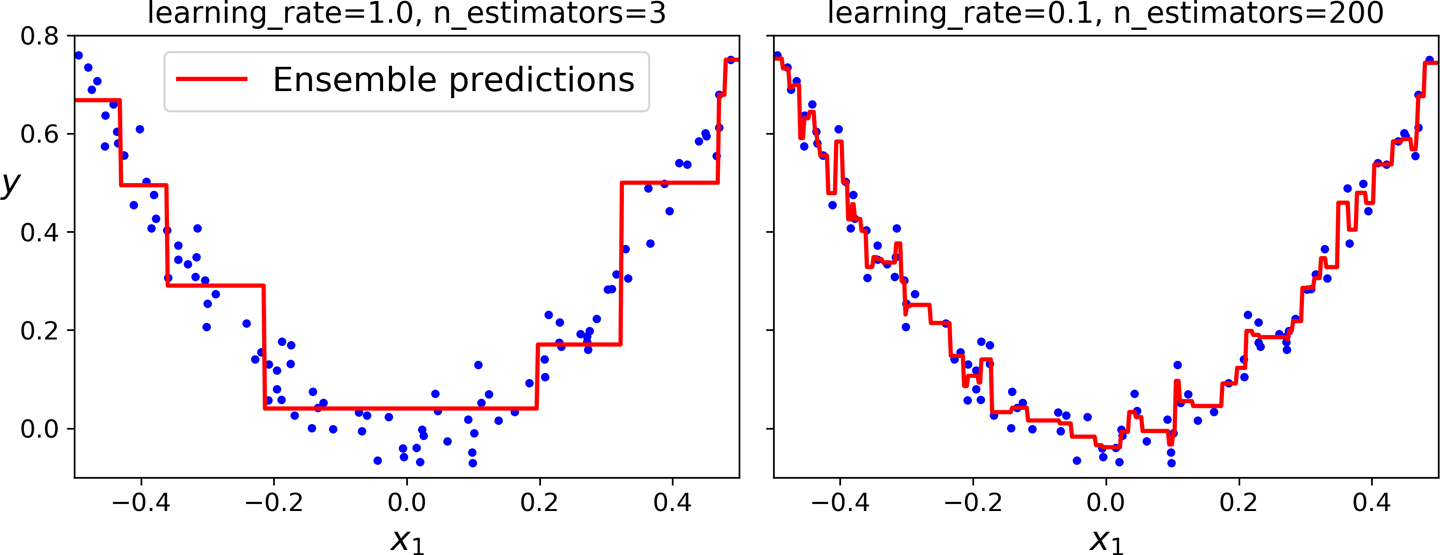

## Gradient Boosting with Early stopping
In order to find the optimal number of trees, you can use early stopping.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the training data in a training set and a validation set.
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# Train a GradientBoostingRegressor:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# Measure the validation error at each stage of training to find the optimal number of trees.
# The staged_predict() returns an iterator over the predictions made by the ensemble at each stage of training.

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors) + 1

# Train another GradientBoostingRegressor using the optimal number of trees:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

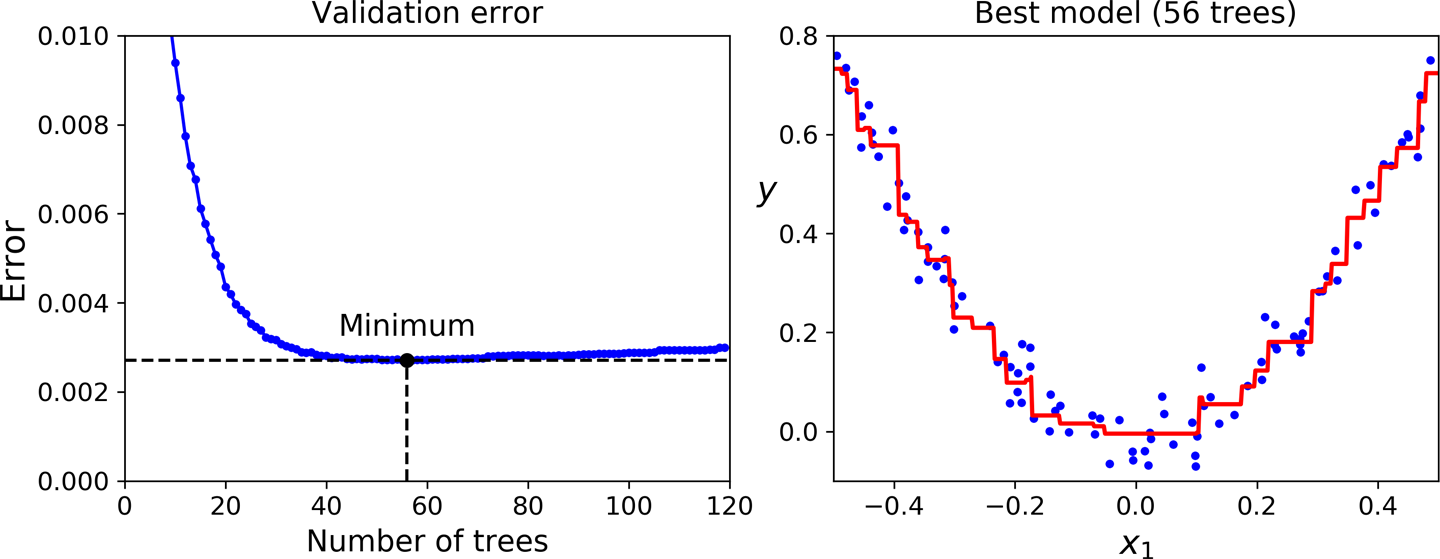